# Trabalho de Inteligência Artificial - Predição de capacidade de pagamento de empréstimo
## Realizado por Leandro Fonseca e Pedro Pinto

### Fonte dos dados: [Link](https://www.kaggle.com/datasets/zaurbegiev/my-dataset?select=credit_train.csv)

Primeiramente foram carregados os dados de treino e os dados de teste

In [2]:
import pandas as pandas
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.inspection import  permutation_importance
from sklearn import svm
from sklearn.svm import SVC
import matplotlib.pyplot as mplt
import numpy as np
from sklearn.model_selection import GridSearchCV
import warnings
import pandas as pandas
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.inspection import  permutation_importance
import matplotlib.pyplot as mplt

warnings.filterwarnings('ignore')

train_data = pandas.read_csv("datasets/credit_train.csv") #carregar csv de treino
test_data = pandas.read_csv("datasets/credit_test.csv") #carregar csv de teste
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

### Análise de dados

Verificação de valores nulos nos dados

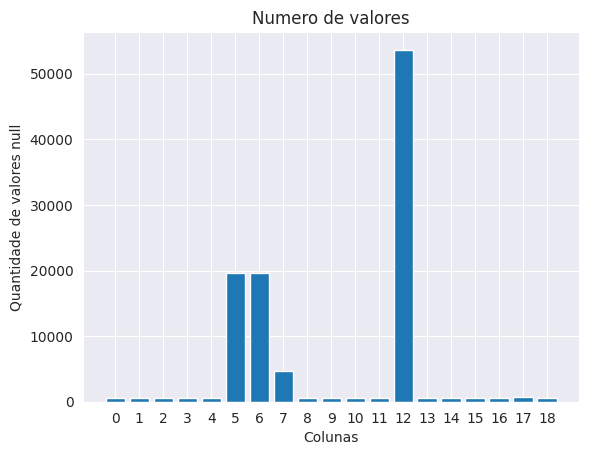

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [3]:
mplt.bar([x for x in range(len(train_data.columns))], train_data.isnull().sum())
x_labels = np.arange(0, 19, 1)
mplt.xticks(ticks=x_labels)
mplt.xlabel('Colunas')
mplt.ylabel('Quantidade de valores null')

# displaying the title
mplt.title("Numero de valores")
mplt.show()
train_data.isnull().sum()

### Eliminou-se colunas com valores inúteis e retirou-se valores nulls e duplicados

In [4]:
train_data.drop(['Months since last delinquent', 'Loan ID', 'Customer ID'],axis=1, inplace=True)
train_data.dropna(axis = 0, inplace = True) #retirar valores nulos
train_data.drop_duplicates(inplace = True) #retirar valores duplicados
train_data.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

# Criação dos modelos

### Divisão dos dados de teste e treino

In [6]:
# Criação de dados de treino e de dados de teste
X = train_data.drop(labels = 'Loan Status', axis = 1).values
y = train_data['Loan Status'].values

x_train , x_test , y_train , y_test = train_test_split(X,y, test_size= 0.30, random_state =86)

### Normalização dos dados

In [11]:
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.fit_transform(x_test)

## Regressão Logística

In [35]:
# Modelo Regressão Logística
log_reg = LogisticRegression(random_state=86)
log_reg.fit(x_train, y_train)
log_reg.score(x_train , y_train)
y_pred = log_reg.predict(x_test)
print("Regressão Logística:")
log_reg_acc_bef = accuracy_score(y_test, y_pred)*100
log_reg_prec_bef = precision_score(y_test, y_pred)*100
log_reg_recall_bef = recall_score(y_test, y_pred)*100
log_reg_f1_bef = f1_score(y_test, y_pred)*100
print("\tAccuracy: "+str(log_reg_acc_bef))
print("\tPrecision: "+str(log_reg_prec_bef))
print("\tRecall: "+str(log_reg_recall_bef))
print("\tF1-Score: "+str(log_reg_f1_bef))

Regressão Logística:
	Accuracy: 82.39245320294366
	Precision: 81.15949688193636
	Recall: 100.0
	F1-Score: 89.60004667580733


## Random Forest

In [36]:
# Modelo Random Forest
rand_forest = RandomForestClassifier(random_state=86)
rand_forest.fit(x_train, y_train)
rand_forest.score(x_train,y_train)
y_pred = rand_forest.predict(x_test)
print("Random Forest:")
rand_forest_acc_bef = accuracy_score(y_test, y_pred)*100
rand_forest_prec_bef = precision_score(y_test, y_pred)*100
rand_forest_recall_bef = recall_score(y_test, y_pred)*100
rand_forest_f1_bef = f1_score(y_test, y_pred)*100
print("\tAccuracy: "+str(rand_forest_acc_bef))
print("\tPrecision: "+str(rand_forest_prec_bef))
print("\tRecall: "+str(rand_forest_recall_bef))
print("\tF1-Score: "+str(rand_forest_f1_bef))

Random Forest:
	Accuracy: 81.82940682570258
	Precision: 81.86531325038202
	Recall: 97.68183890082699
	F1-Score: 89.07692764466613


## KNN

In [9]:
# Modelo KNN
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_train, y_train)
y_pred = knn.predict(x_test)
print("KNN:")
knn_acc_bef = accuracy_score(y_test, y_pred)*100
knn_prec_bef = precision_score(y_test, y_pred)*100
knn_recall_bef = recall_score(y_test, y_pred)*100
knn_f1_bef = f1_score(y_test, y_pred)*100
print("\tAccuracy: "+str(knn_acc_bef))
print("\tPrecision: "+str(knn_prec_bef))
print("\tRecall: "+str(knn_recall_bef))
print("\tF1-Score: "+str(knn_f1_bef))

KNN:
	Accuracy: 79.79947646564924
	Precision: 82.01761864165957
	Recall: 93.97017646675782
	F1-Score: 87.58800679776645


## Arvore de Decisão

In [38]:
# Modelo Decision Tree
dec_tree = DecisionTreeClassifier(random_state=86)
dec_tree.fit(x_train, y_train)
dec_tree.score(x_train, y_train)
y_pred = dec_tree.predict(x_test)
print("Àrvore de Decisão:")
dec_tree_acc_bef = accuracy_score(y_test, y_pred)*100
dec_tree_prec_bef = precision_score(y_test, y_pred)*100
dec_tree_recall_bef = recall_score(y_test, y_pred)*100
dec_tree_f1_bef = f1_score(y_test, y_pred)*100
print("\tAccuracy: "+str(dec_tree_acc_bef))
print("\tPrecision: "+str(dec_tree_prec_bef))
print("\tRecall: "+str(dec_tree_recall_bef))
print("\tF1-Score: "+str(dec_tree_f1_bef))

Àrvore de Decisão:
	Accuracy: 69.7535437348743
	Precision: 83.38274640248753
	Recall: 75.08627987237091
	F1-Score: 79.01733707942165


# Hyper-Tuning
### Usou-se o GridSearch para achar os melhores paramêtros para os modelos atuais

## Regressão Logística

In [7]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# parameter grid
parameters = {
    'penalty' : ['l1','l2'],
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
logreg = LogisticRegression(random_state=86)
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds
clf.fit(x_train,y_train)
print("Tuned Hyperparameters :", clf.best_params_)

Tuned Hyperparameters : {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}


In [13]:
logreg = LogisticRegression(C = 0.001,
                            penalty = 'l1',
                            solver = 'liblinear', random_state=86)
logreg.fit(x_train,y_train)
pred = logreg.predict(x_test)
print("Regressão Logística:")
log_reg_acc_aft = accuracy_score(y_test, pred)*100
log_reg_prec_aft = precision_score(y_test, pred)*100
log_reg_recall_aft = recall_score(y_test, pred)*100
log_reg_f1_aft = f1_score(y_test, pred)*100
print("\tAccuracy: "+str(log_reg_acc_aft))
print("\tPrecision: "+str(log_reg_prec_aft))
print("\tRecall: "+str(log_reg_recall_aft))
print("\tF1-Score: "+str(log_reg_f1_aft))

Regressão Logística:
	Accuracy: 82.39739220625277
	Precision: 81.16378626922467
	Recall: 100.0
	F1-Score: 89.60266059863469


## Random Forest

In [40]:
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rand_forest, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
print("Tuned Hyperparameters :", CV_rfc.best_params_)

KeyboardInterrupt: 

In [15]:
rand_forest=RandomForestClassifier(random_state=86, max_features='auto', n_estimators= 200, max_depth=4, criterion='gini')
rand_forest.fit(x_train, y_train)
y_pred=rand_forest.predict(x_test)
print("Random Forest:")
rand_forest_acc_aft = accuracy_score(y_test, y_pred)*100
rand_forest_prec_aft = precision_score(y_test, y_pred)*100
rand_forest_recall_aft = recall_score(y_test, y_pred)*100
rand_forest_f1_aft = f1_score(y_test, y_pred)*100
print("\tAccuracy: "+str(rand_forest_acc_aft))
print("\tPrecision: "+str(rand_forest_prec_aft))
print("\tRecall: "+str(rand_forest_recall_aft))
print("\tF1-Score: "+str(rand_forest_f1_aft))

Random Forest:
	Accuracy: 82.39739220625277
	Precision: 81.16378626922467
	Recall: 100.0
	F1-Score: 89.60266059863469


## KNN

In [10]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False)
grid_knn.fit(x_train,y_train)
print("Tuned Hyperparameters :", grid_knn.best_params_)

Tuned Hyperparameters : {'n_neighbors': 29}


In [17]:
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("KNN:")
knn_acc_aft = accuracy_score(y_test, y_pred)*100
knn_prec_aft = precision_score(y_test, y_pred)*100
knn_recall_aft = recall_score(y_test, y_pred)*100
knn_f1_aft = f1_score(y_test, y_pred)*100
print("\tAccuracy: "+str(knn_acc_aft))
print("\tPrecision: "+str(knn_prec_aft))
print("\tRecall: "+str(knn_recall_aft))
print("\tF1-Score: "+str(knn_f1_aft))

KNN:
	Accuracy: 82.1701980540327
	Precision: 81.2403595553428
	Recall: 99.45952985609169
	F1-Score: 89.43146554247907


## Arvore de Decisão

In [109]:
param_grid_decision_tree = [
        {'criterion': ['gini', 'entropy'],
         'max_depth': range(1, 15),
         'max_features': ['sqrt', 'log2']
        }
    ]

grid_decision_tree = GridSearchCV(DecisionTreeClassifier(random_state=86), param_grid=param_grid_decision_tree, cv=5, verbose=False, n_jobs=-1)

grid_decision_tree.fit(x_train, y_train)
print("Tuned Hyperparameters :", grid_decision_tree.best_params_)

Tuned Hyperparameters : {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt'}


In [18]:
dec_tree = DecisionTreeClassifier(random_state=86, criterion='entropy', max_depth=9, max_features='sqrt')
dec_tree.fit(x_train, y_train)
y_pred = dec_tree.predict(x_test)
print("Àrvore de Decisão:")
dec_tree_acc_aft = accuracy_score(y_test, y_pred)*100
dec_tree_prec_aft = precision_score(y_test, y_pred)*100
dec_tree_recall_aft = recall_score(y_test, y_pred)*100
dec_tree_f1_aft = f1_score(y_test, y_pred)*100
print("\tAccuracy: "+str(dec_tree_acc_aft))
print("\tPrecision: "+str(dec_tree_prec_aft))
print("\tRecall: "+str(dec_tree_recall_aft))
print("\tF1-Score: "+str(dec_tree_f1_aft))

Àrvore de Decisão:
	Accuracy: 81.96769891835828
	Precision: 80.98464796188459
	Recall: 99.61581037963144
	F1-Score: 89.33921219376879


# Análise dos modelos

## Regressão Logística

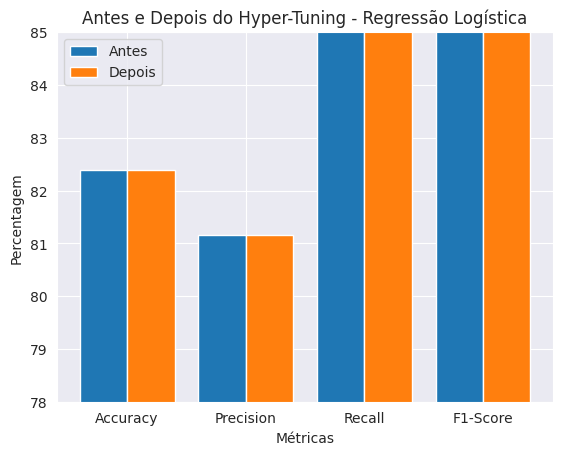

In [56]:
model_labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

log_reg_bef = [log_reg_acc_bef, log_reg_prec_bef, log_reg_recall_bef, log_reg_f1_bef]
log_reg_aft = [log_reg_acc_aft, log_reg_prec_aft, log_reg_recall_aft, log_reg_f1_aft]

x_axis = np.arange(len(model_labels))

mplt.bar(x_axis - 0.2, log_reg_bef, 0.4, label = 'Antes')
mplt.bar(x_axis + 0.2, log_reg_aft, 0.4, label = 'Depois')

mplt.ylim(65,100)
mplt.xticks(x_axis, model_labels)
mplt.xlabel("Métricas")
mplt.ylabel("Percentagem")
mplt.title("Antes e Depois do Hyper-Tuning - Regressão Logística")
mplt.legend()
mplt.show()

## Random Forest

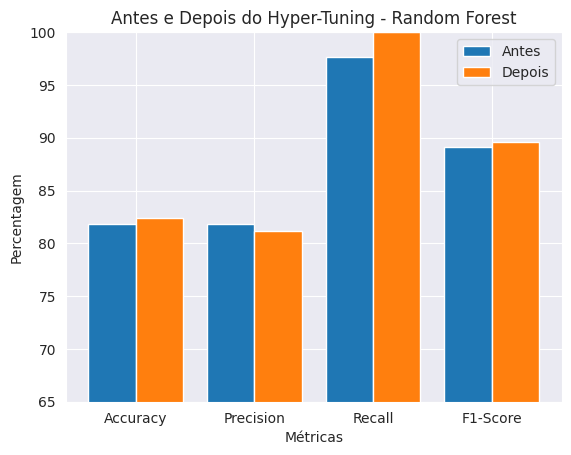

In [58]:
model_labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

rand_forest_bef = [rand_forest_acc_bef, rand_forest_prec_bef, rand_forest_recall_bef, rand_forest_f1_bef]
rand_forest_aft = [rand_forest_acc_aft, rand_forest_prec_aft, rand_forest_recall_aft, rand_forest_f1_aft]

x_axis = np.arange(len(model_labels))

mplt.bar(x_axis - 0.2, rand_forest_bef, 0.4, label='Antes')
mplt.bar(x_axis + 0.2, rand_forest_aft, 0.4, label='Depois')

mplt.ylim(65, 100)
mplt.xticks(x_axis, model_labels)
mplt.xlabel("Métricas")
mplt.ylabel("Percentagem")
mplt.title("Antes e Depois do Hyper-Tuning - Random Forest")
mplt.legend()
mplt.show()

## KNN

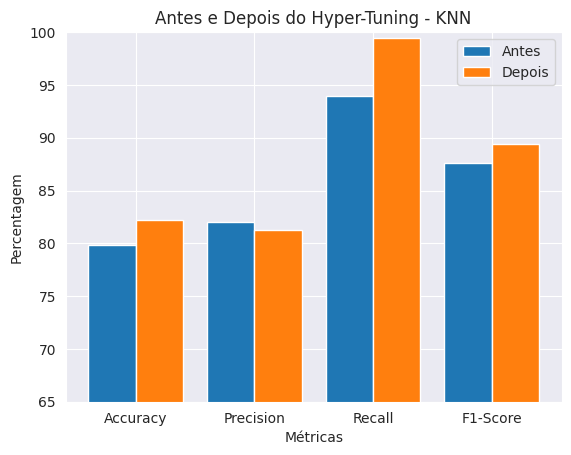

In [59]:
model_labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

knn_bef = [knn_acc_bef, knn_prec_bef, knn_recall_bef, knn_f1_bef]
knn_aft = [knn_acc_aft, knn_prec_aft, knn_recall_aft, knn_f1_aft]

x_axis = np.arange(len(model_labels))

mplt.bar(x_axis - 0.2, knn_bef, 0.4, label='Antes')
mplt.bar(x_axis + 0.2, knn_aft, 0.4, label='Depois')

mplt.ylim(65, 100)
mplt.xticks(x_axis, model_labels)
mplt.xlabel("Métricas")
mplt.ylabel("Percentagem")
mplt.title("Antes e Depois do Hyper-Tuning - KNN")
mplt.legend()
mplt.show()

## Arvore de Decisão

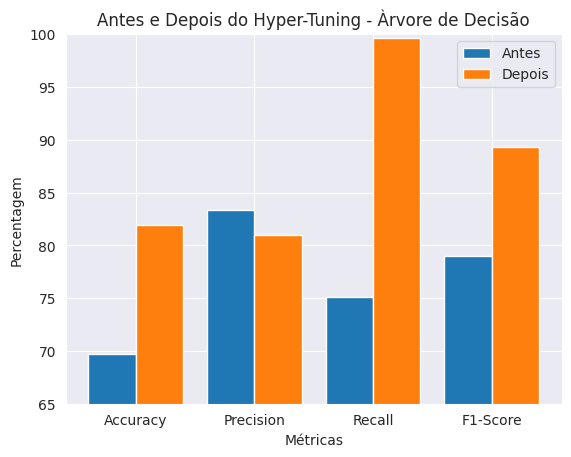

In [60]:
model_labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

dec_tree_bef = [dec_tree_acc_bef, dec_tree_prec_bef, dec_tree_recall_bef, dec_tree_f1_bef]
dec_tree_aft = [dec_tree_acc_aft, dec_tree_prec_aft, dec_tree_recall_aft, dec_tree_f1_aft]

x_axis = np.arange(len(model_labels))

mplt.bar(x_axis - 0.2, dec_tree_bef, 0.4, label='Antes')
mplt.bar(x_axis + 0.2, dec_tree_aft, 0.4, label='Depois')

mplt.ylim(65, 100)
mplt.xticks(x_axis, model_labels)
mplt.xlabel("Métricas")
mplt.ylabel("Percentagem")
mplt.title("Antes e Depois do Hyper-Tuning - Àrvore de Decisão")
mplt.legend()
mplt.show()

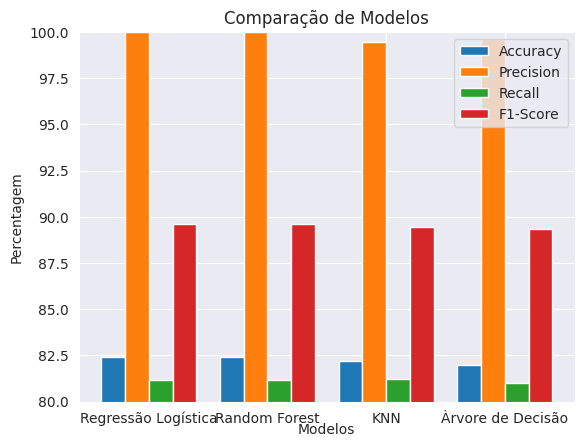

In [19]:
model_labels = ['Regressão Logística', 'Random Forest', 'KNN', 'Àrvore de Decisão']

acc = [log_reg_acc_aft, rand_forest_acc_aft, knn_acc_aft, dec_tree_acc_aft]
prec = [log_reg_prec_aft, rand_forest_prec_aft, knn_prec_aft, dec_tree_prec_aft]
recall = [log_reg_recall_aft, rand_forest_recall_aft, knn_recall_aft, dec_tree_recall_aft]
f1 = [log_reg_f1_aft, rand_forest_f1_aft, knn_f1_aft, dec_tree_f1_aft]

x_axis = np.arange(len(model_labels))
space = 0.2

mplt.bar(x_axis, acc, 0.2, label='Accuracy')
mplt.bar(x_axis+space, recall, 0.2, label='Precision')
mplt.bar(x_axis+space*2, prec, 0.2, label='Recall')
mplt.bar(x_axis+space*3, f1, 0.2, label='F1-Score')

mplt.ylim(80, 100)
mplt.xticks(x_axis+space*1.5, model_labels)
mplt.xlabel("Modelos", labelpad=-2)
mplt.ylabel("Percentagem")
mplt.title("Comparação de Modelos")
mplt.legend()
mplt.show()